In [1]:
!pip install pandas

In [3]:
!pip install matplotlib seaborn glob2 ipython librosa numpy scipy soxr
# Before installing librosa we have to install other dependencies also because it has many dependencies in itself.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob2 import glob
import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [7]:
from glob import glob

# Load all .wav files from dolphin, torpedo, and ship folders
audio_files = glob("C:/Users/dhanu/DATASET/Dataset/*/*.wav")

print(audio_files)

['C:/Users/dhanu/DATASET/Dataset\\Cargo\\103.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\110.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\15.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\27.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\38.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\41.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\44.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\62.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\69.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\78.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\96.wav', 'C:/Users/dhanu/DATASET/Dataset\\Cargo\\99.wav', 'C:/Users/dhanu/DATASET/Dataset\\Dolphins\\spotted_dolphin001.wav', 'C:/Users/dhanu/DATASET/Dataset\\Dolphins\\spotted_dolphin002.wav', 'C:/Users/dhanu/DATASET/Dataset\\Dolphins\\spotted_dolphin003.wav', 'C:/Users/dhanu/DATASET/Dataset\\Dolphins\\spotted_dolphin004.wav', 'C:/Users/dhanu/DATASET/Dataset\\Dolphins\\spotted_dolphin005.wav', 'C:/Users/dhanu/DATASET/Dataset\\Dolphins\\spotted_dolphin006.wav', '

In [9]:
# LABEL = SHIP TYPE

print(len(audio_files))

559


In [11]:
ipd.Audio(audio_files[50])


In [13]:
!pip install librosa

In [15]:
!pip show librosa

Name: librosa
Version: 0.11.0
Summary: Python module for audio and music processing
Home-page: https://librosa.org
Author: Brian McFee, librosa development team
Author-email: brian.mcfee@nyu.edu
License: ISC
Location: C:\Users\dhanu\anaconda3\Lib\site-packages
Requires: audioread, decorator, joblib, lazy_loader, msgpack, numba, numpy, pooch, scikit-learn, scipy, soundfile, soxr, typing_extensions
Required-by: 


In [17]:
import librosa

In [19]:
#pip install --upgrade paramiko cryptography


In [21]:
pip install cryptography==42.0.8


Note: you may need to restart the kernel to use updated packages.


In [23]:
!pip show cryptography
!pip show pyopenssl



Name: cryptography
Version: 42.0.8
Summary: cryptography is a package which provides cryptographic recipes and primitives to Python developers.
Home-page: https://github.com/pyca/cryptography
Author: 
Author-email: The Python Cryptographic Authority and individual contributors <cryptography-dev@python.org>
License: Apache-2.0 OR BSD-3-Clause
Location: C:\Users\dhanu\anaconda3\Lib\site-packages
Requires: cffi
Required-by: anaconda-cloud-auth, conda-content-trust, paramiko, pyOpenSSL, Scrapy, service-identity
Name: pyOpenSSL
Version: 24.2.1
Summary: Python wrapper module around the OpenSSL library
Home-page: https://pyopenssl.org/
Author: The pyOpenSSL developers
Author-email: cryptography-dev@python.org
License: Apache License, Version 2.0
Location: C:\Users\dhanu\anaconda3\Lib\site-packages
Requires: cryptography
Required-by: Scrapy


In [25]:
y, sr = librosa.load(audio_files[48])
# y -> raw data of the audio file
# sr -> sampling rate of the audio file

In [27]:
print(f'y: {y[:10]}')
print(f'y shape: {y.shape}')
print(f'sr: {sr}')

y: [0.00049902 0.00175146 0.0022182  0.00036224 0.00119329 0.00124697
 0.00183372 0.00147426 0.00155518 0.00157361]
y shape: (29331,)
sr: 22050


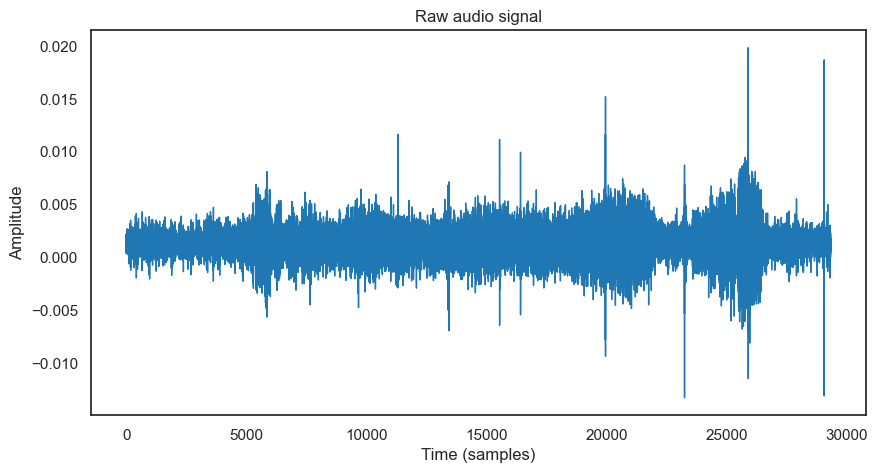

In [29]:
pd.Series(y).plot(figsize=(10, 5),lw = 1,color = color_pal[0])
plt.title('Raw audio signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

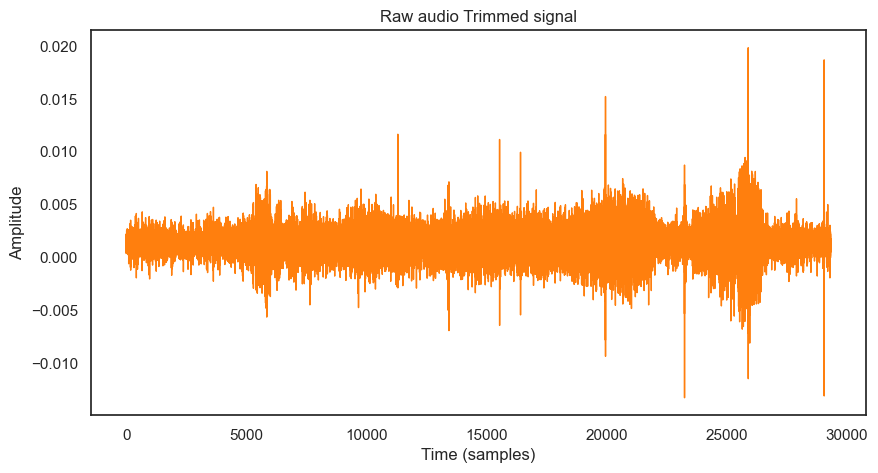

In [31]:
y_trimmed, _ = librosa.effects.trim(y,top_db=20)
#  help to trim(remove) empty spaces...plane lines 
pd.Series(y).plot(figsize=(10, 5),lw = 1,color = color_pal[1])
plt.title('Raw audio Trimmed signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

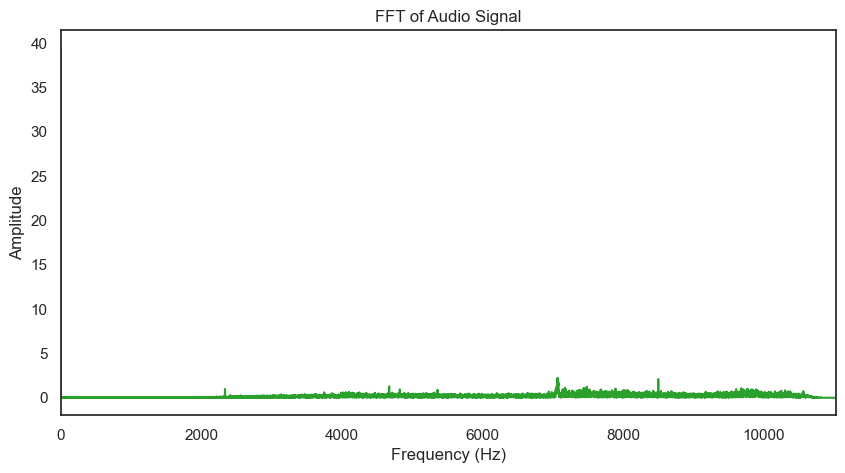

In [32]:
# Compute the Fast Fourier Transform (FFT) of the audio signal
# This will convert the time-domain signal into the frequency domain.
# The FFT is a powerful algorithm to compute the Discrete Fourier Transform (DFT) and its inverse.
fft_vals = np.fft.fft(y)
fft_freq = np.fft.fftfreq(len(fft_vals), 1/sr)

# Only take the positive frequencies
pos_mask = fft_freq >= 0
fft_freq = fft_freq[pos_mask]
fft_power = np.abs(fft_vals[pos_mask])

plt.figure(figsize=(10, 5))
plt.plot(fft_freq, fft_power, color=color_pal[2])
plt.title('FFT of Audio Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim([0, sr/2])
plt.show()

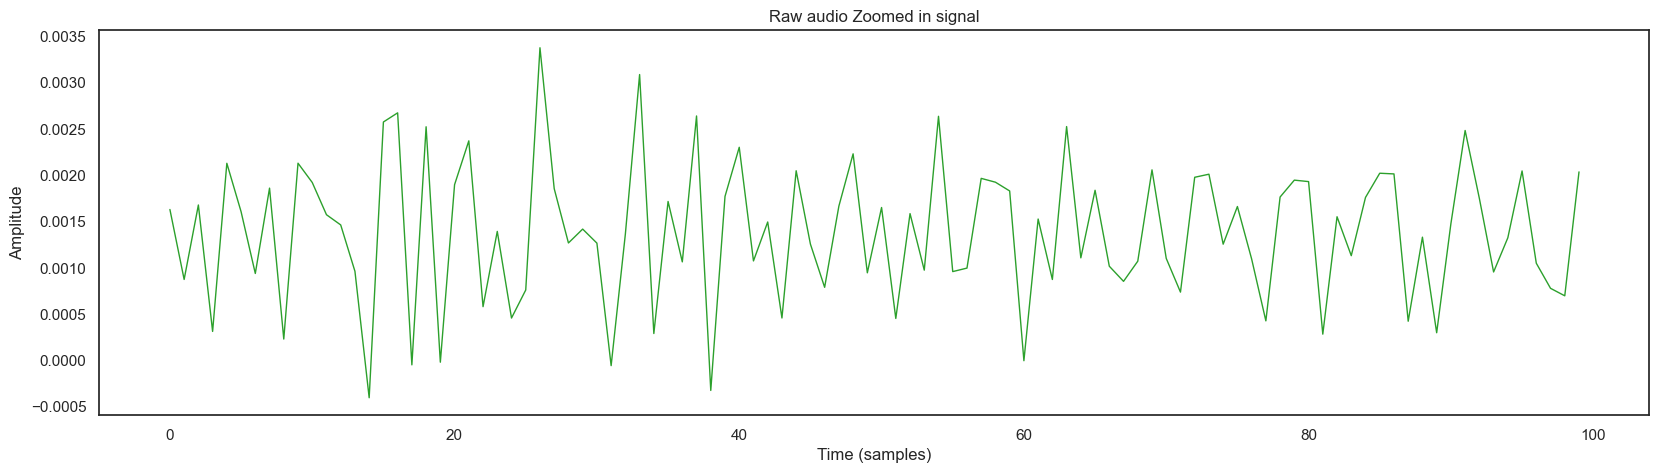

In [33]:
pd.Series(y[2000:2100]).plot(figsize=(20, 5),lw = 1,color = color_pal[2])
plt.title('Raw audio Zoomed in signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()


In [34]:
# Calculate average power (mean of squared amplitude)
avg_power = np.mean(fft_power ** 2)

# Intensity is often proportional to power for audio signals
avg_intensity = avg_power

# Sample rate is already given by sr
avg_sample_rate = sr

# Loudness can be estimated as the mean dB value of the FFT power (avoid log(0) by adding small epsilon)
epsilon = 1e-10
loudness_db = 10 * np.log10(fft_power + epsilon)
avg_loudness = np.mean(loudness_db)

print(f"Average Power: {avg_power}")
print(f"Average Intensity: {avg_intensity}")
print(f"Sample Rate: {avg_sample_rate}")
print(f"Average Loudness (dB): {avg_loudness}")

Average Power: 0.17102778450118608
Average Intensity: 0.17102778450118608
Sample Rate: 22050
Average Loudness (dB): -9.971044940736963


In [39]:
# Compute the Short-Time Fourier Transform (STFT)
# This will give us a time-frequency representation of the audio signal
trans = librosa.stft(y)
spect_db = librosa.amplitude_to_db(np.abs(trans), ref=np.max)
spect_db.shape

(1025, 58)

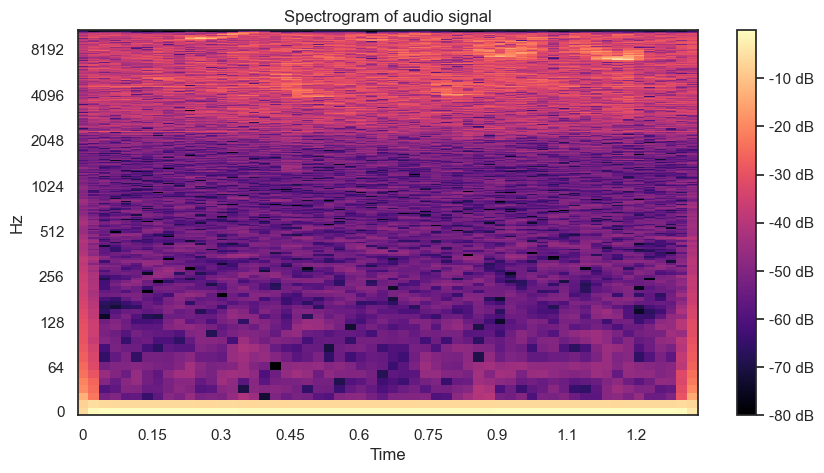

In [41]:
# Plot the transformed audio data
fig , ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(spect_db,x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectrogram of audio signal')
fig.colorbar(img, ax=ax, format="%+2.f dB")

Mel Spectrogram

In [44]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.amplitude_to_db(S, ref=np.max)

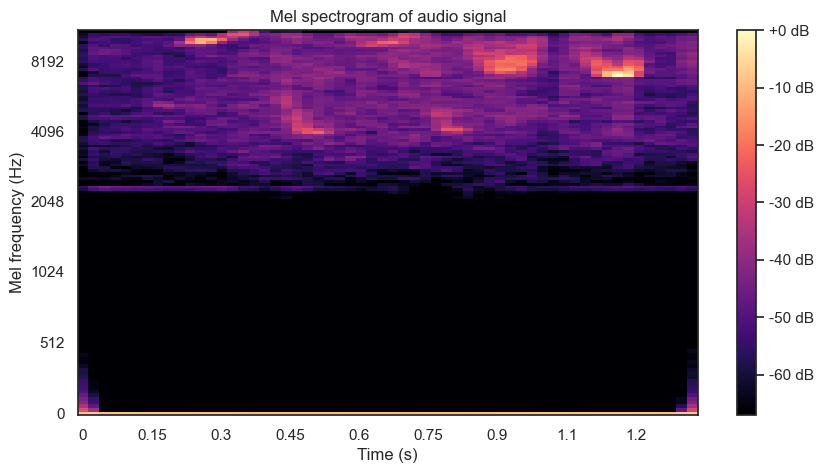

In [46]:
fig,ax =  plt.subplots(figsize=(10, 5))
plt.title('Mel spectrogram of audio signal')
# plot the mel spectrogram

img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(img, format="%+2.f dB")
plt.xlabel('Time (s)')
plt.ylabel('Mel frequency (Hz)')  
plt.show()

--Data Preprocessing--

In [49]:
import os
import numpy as np
from glob import glob
import librosa
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


Step-1: Getting File Paths and Labels

In [52]:
# Path to your dataset
base_path = "C:/Users/dhanu/DATASET/Dataset"

# Get all .wav files from all subfolders
audio_files = glob(base_path + "/*/*.wav")

# Extract labels (folder names like dolphin, torpedo, ship)
labels = [file.split("\\")[-2] for file in audio_files]

# Encode string labels to integers
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)

print("Classes:", le.classes_)  # Output: ['dolphin' 'ship' 'torpedo']


Classes: ['Cargo' 'Dolphins' 'Passengership' 'Submarine' 'Tanker' 'Torpedo' 'Tug'
 'Whale']


Step-2: Define a Function to Extract Features (e.g., MFCC)

In [55]:
def extract_features(file_path, max_pad_len=862):  # 862 = around 5 sec for 22050Hz
    try:
        audio, sample_rate = librosa.load(file_path, sr=22050)
        mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        
        # Padding or trimming to fixed length
        if mfcc.shape[1] < max_pad_len:
            pad_width = max_pad_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_pad_len]
        
        return mfcc
    except Exception as e:
        print("Error processing", file_path, ":", e)
        return None

Step-3: Apply Feature Extraction on All Files

In [58]:
features = []
final_labels = []

for i, file_path in enumerate(audio_files):
    mfcc = extract_features(file_path)
    if mfcc is not None:
        features.append(mfcc)
        final_labels.append(encoded_labels[i])


Step-4: Convert to NumPy Arrays for Model Input

In [62]:
X = np.array(features)                     # Shape: (num_samples, 40, 862)
X = X[..., np.newaxis]                    # Add channel dimension for CNN: (samples, 40, 862, 1)
y = np.array(final_labels)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (559, 40, 862, 1)
y shape: (559,)


**Marine Acoustic Signature Classification using CRNN**

In [ ]:
!pip install tensorflow
